<a href="https://colab.research.google.com/github/institutohumai/cursos-python/blob/master/MachineLearning/10_AprendizajeNoSupervisado/aprendizaje_no_supervisado.ipynb"> <img src='https://colab.research.google.com/assets/colab-badge.svg' /> </a>

# Aprendizaje no supervisado 

Vimos a en el curso aprendizaje supervisado donde los estimadores predicen resultados basados en datos que poseen un valor 'target'. Ya sea una etiqueta (clasificación) o un valor (regresión) 
En este caso nos vamos a adentrar en técnicas de apredizaje no supervisado. Donde vamos a tratar de ajustar algorítmos que interprenten la distribución de nuestros datos sin tener un target específico si no trabajando con la naturaleza propia de los datos.  

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Clustering 

Clustering, agrupar en inglés, es una forma de aprendizaje no supervisado donde el objetivo es agrupar o encontrar grupos ideales para categorizar nuestros datos. El algorítmo tratara de encontrar la mejor división que se ajuste a las propiedades de los datos. 

- **Parámetro K**
Entre las distinciones que se pueden hacer sobre este algoritmo vamos a hablar de aquellos done el usuario define la cantidad de grupos a encontrar y los algoritmos que encuentran por si solos el número de grupos óptimo. 
La cantidad de grupos suele estar representado por la letra K 

### K-Means
Un modelo muy utilizado para clusterización es el que vamos a ver a continuación k-Means (Ojo no confundir con KNN que es un módelo de clasificación supervisado)

Algoritmo: 

* Asignar centroides (centro del cluster). En la primera iteración va a ser al azar luego se calcularan tomando el promedio de los puntos de cada cluster. 
* Calcular qué punto pertenece a cada cluster
* Promediar todos los puntos en cada dimensión para recalcular el centroide
* Repetir hasta que los puntos dejen de cambiar de cluster. De tal manera que cada punto va a estar mas cerca del centroide de su cluster antes que cualquier otro centroide. 

Este proceso utiliza el algorítmo 'Expectation-maximization (E-M)'. En este caso los pasos serían: 

* Expectation step: asignar cada punto al centroide más cercano 
* Maximization step: reasignar un centroide que sea el promedio de los nuevos puntos y evaluar si es mejor que el anterior 

Para este proceso de optimización el algoritmo elige centroides que minimicen la **inertia** que es una métrica que se entiende por que tan coherentes son los cluster dentro de sí. Esta métrica no esta normalizada simplemente nos interesa tener el menor valor posible. 
<center><img src=https://github.com/institutohumai/cursos-python/raw/ml0/MachineLearning/media/image34.png width=500></center>

Ver animación en: 

https://stanford.edu/class/engr108/visualizations/kmeans/kmeans.html




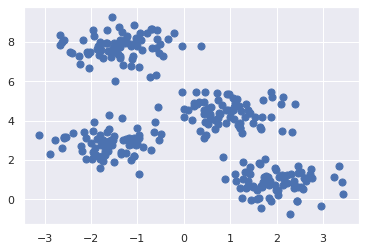

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4 )
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

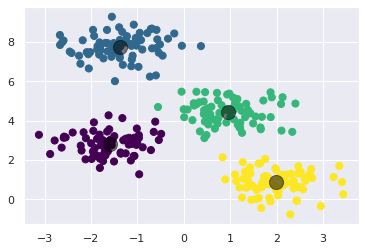

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#### Limitaciones: KMeans 

- Puede ocurrir que el proceso E-M no llegue a la mejor solución. No siempre se llega a la solución óptima esto depende mucho da la inicialización al azar de los centroides. La implementación de la librería Scikit-Learn cuenta con el parámetro `n_init` que nos permite establecer la cantidad de veces que queremos que el algoritmo se inicialice varias veces para conseguir una primer asignacion de centroides que permita llegar al resultado optimo. 

- Hay una suposición muy fuerte que hace el algoritmo y que es necesario tener en cuenta: Kmeans trabaja sobre la hipótesis de que va a existir centroides que tengan más cerca a los puntos de su propio cluster que otros. Para que esto sea verdad es necesario que los puntos se distribuyan en geometrías convexas en espacio euclidianos.

- Como el algoritmo trabaja con distancias es recomendable normalizar nuestras muestras. 



### DBSCAN 

Otro algorítmo de clustering que resuelve algunas de las limitaciones que presenta K-means es DBSCAN. Un algoritmo que clusteriza por densidad de puntos en el espacio. 
Para esto el algorítmo busca los casos centrales donde hay gran densidad y los utiliza para determinar el centro de cada cluster. 
DBSCAN trabaja con distintas geometrías al contrario de K-means. 
Los parámetros que van a definir la densidad límite para clusterizar son `min_samples` y `eps`. A mayor min_samples o menor eps vamos a estar buscando una mayor densidad para generar los cluster. Min samples refiere a la cantidad de casos centrales que va a encontrar el algorítmo y eps a la distancia del resto de los casos a aquellos centrales. El primer parámetro controla la tolerancia del algoritmo al ruido (cuanto mas ruidoso el dataset es mejor aumentar dicho parámetro). En cuanto al parámetro eps, es importante evaluar su valor ya que influye de gran manera en los resultados del algoritmo. 
Si el valor de eps es demasiado pequeño la data puede ser clasificada como -1 caso contrario toda los datos pueden ser agrupados en un solo cluster erroneamente. 


In [51]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

generamos datos 


In [52]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

Utilizamos DBSCAN para encontrar los clusters 

In [58]:
db = DBSCAN(eps=0.4, min_samples=9).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('vemos algunas métricas para determinar la performance de nuestro modelo')
print("Estimado número de cluster: %d" % n_clusters_)
print("Estimado número de puntos ruidosos: %d" % n_noise_)
print("homoheneidad: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("completitud: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Ajuste Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print(
    "Ajuste Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(labels_true, labels)
)
print("Coeficiente Silhouette: %0.3f" % metrics.silhouette_score(X, labels))

vemos algunas métricas para determinar la performance de nuestro modelo
Estimado número de cluster: 1
Estimado número de puntos ruidosos: 2
homoheneidad: 0.001
completitud: 0.059
V-measure: 0.002
Ajuste Rand Index: -0.000
Ajuste Mutual Information: -0.001
Coeficiente Silhouette: 0.061


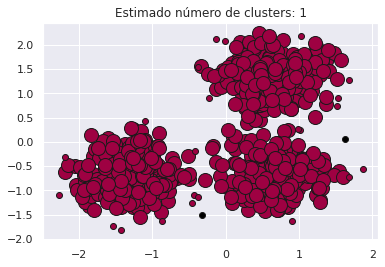

In [59]:
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimado número de clusters: %d" % n_clusters_)
plt.show()

- Como vemos este modelo de clusterización encuentra por si solo la mejor cantidad de clusters. Sin embargo esto se puede ir modificando a través de los parámetros que vimos. Pero no es necesario defenir el número de clusters como pasaba en K-means. 
- DBSCAN es un modelo determinístico lo que indica que siempre va a llegar al mismo resultado al contrario de kmeans donde la aleatoreidad de la inicialización puedo llevarnos a diferentes tipos de resultados 
- Una mejora de este algoritmo es HDBSCAN 

### Limitaciones: DBSCAN 

La principal limitación que presenta este método es la eficiencia en términos de memoria. Para grandes cantidades de datos con mucha dimensionalidad no performa bien ya que debe hacer una matríz de covarianza entre variables y en casos donde las dimensiones son muy grandes la operación consumen demasiada memoria. 
Otro algoritmo que permite sortear este problema es OPTICS también presente en la librería Scikit-learn o HDBSCAN. 


### Evaluando calidad de clusterización. 

Evaluar la calidad de la clusterización no es tan sencillo como cuando teniamos un target. En este caso entender si estamos haciendo las cosas bien sin tener una 'respuesta' a la cual queremos llegar va a depender de ciertas métricas que nos indique que tan bien está ajustando el algorítmo a los datos. 
Podemos hablar por ejemplo de que tan bien se separan los clusters, o si los elementos de un cluster se parecen más entre si que al resto utilizando alguna métrica de similaridad. 
Mencionamos algunas métricas: 

- **Inertia**:
En el caso del método K-means la métrica utilizada para evaluar es **inertia**, que es la métrica que el mismo modelo trata de optimizar. A menor valor mejores métricas. 
- **Rand index**:
Si bien estos métodos son de aprendizaje no supervisado podemos tener el caso donde sabemos los grupos pertenecientes. En este caso podemos utilizar rand index que nos va a dar un score. Similar cuando trabajamos con clasificación
- **Coeficiente Silhouette**:
este coeficiente describe que tan bien agrupan los clusters. A mayor coeficiente vamos a encontrar grupos mejor definidos. Esta métrica trabaja con la distancia entre un punto y el resto de los puntos de su propio grupo y la distancia entre un punto y los puntos de grupo más cercano que no es el de sí mismo. Este valor esta normalizado entre -1 y 1. Este coeficiente funciona mejor con formas convexas. 
- **Calinski-Harabasz Index**: A mayor valor mejores grupos esta encontrando nuestro método de clusterización. Esta métrica trabaja con la disperción de los clusters. 




## Reducción de dimensionalidad 

Otros algoritmos de aprendizaje no supervisado muy utilizados son los algoritmos de reducción de dimensionalidad. 
Estos algorítmos pueden ser muy útiles para diversos tipos de problema: visualizar datos de gran dimensionalidad, para filtrar ruido, para realizar extración e ingeniería de datos. 



### Principal Componet Analysis: PCA 

Este metodo no supervisado para la reducción de dimensionalidad es muy flexible y da buenos resultados para la mayoría de los tratamientos. Vamos a trabajar con la introducción brindada por la librería [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)



(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

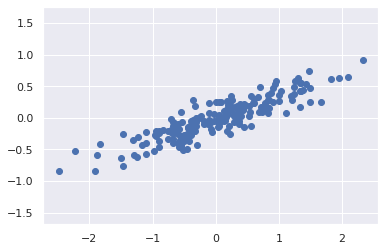

In [60]:
#generamos datos sintéticos: (de mentira :p) 
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')

Vemos una relación lineal entre los datos. 

Para realizar una reducción de dimensionalidad este método usa la matriz de covarianza entrre las variables y la descompone en una matríz autovectores para entender como explicar la relación entre los puntos con los vectores fundamentales. 

La matríz de covarianza es la matriz donde los elementos i,j de la matriz representan la covarianza entre la variable i y la variabe j.


Algunas propiedades para tener encuenta sobre la covarianza: 

* La covarianza de un vector contra si mismo es igual a su varianza. 
* Cada elemento de la diagonal principal representa la varianza de la variable correspondiente 
* La matriz de covarianza es simétrica 


- PCA: 
Evalua la relación entre variables utilizando la matríz de covarianza y entiende los principales componentes que describe nuestros datos a través de sus autovalores. El peso que tiene cada autovector para describir la naturaleza de los datos es dado por su autovalor asociado. 

In [61]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [62]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

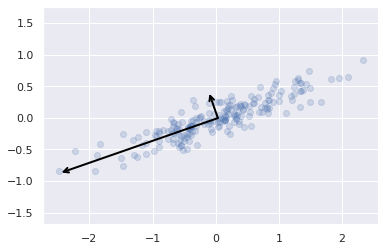

In [63]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

#### Implementacion: de R2 a R 

Cuando tenemos un dataset de alta dimensionalidad, para reducirlo, PCA va a eliminar los componentes principales de menor influencia para mantener la maxima cantidad de varianza posible. 

In [64]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


si aplicamos la reducción de las 2 dimensiones que teniamos anteriormente a 1 lo que obtendremos sobre la data original: 

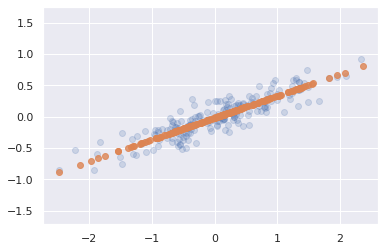

In [66]:
#vemos que pasa en el gráfico. 
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

#### Paso a paso 

* Normalizamos los datos
<center><img src=https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/national/Principal%2520Component%2520Analysis%2520Standardization.png width=200></center>

* obtenemos matriz de covarianza.
Ejemplo R3
<center><img src=https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/national/Principal%2520Component%2520Analysis%2520Covariance%2520Matrix.png width=200></center>
los valores positivos van a indicar relaciones positivas (crecen o decrecen de la misma manera) y viciverza. 
* Obtenemos autovectores y autovalores para entender los componentes principales y su importancia. Si recordamos un poco de Álgebra los autovalores son los vectores principales que explican un espacio. De otra manera, son los mínimos vectores necesarios que al combinarlos linealmente pueden recrear todo el subespacio. En nuetro caso todo el dataset. Estos vectores no estan correlacionados entre sí. Aquellos autovectores con autovalores más grandes son los más determinantes del subespacio. Los que poseen mayor información o **explican la mayor cantidad de varianza**. Este último concepto es importante: Relacionamos información con varianza ya que a mayor dispersión de datos estamos teniendo mayor cantidad de información. Si los datos estan muy compactos en pocos valores, o sea poseen poca dispersión, estamos teniendo poca información. Pocos valores. 
La idea detras de PCA es eliminar esos componentes que no otorgan información significativa sobre nuestros datos. En el caso visto más arriba vemos que el autovector de menor magnitud es aquel que es eliminado para hacer la reducción de dimensionalidad y nos quedamos con el mayor para recrear nuestro subespacio con una dimensión menor. 



In [68]:
#Normalizamos solo extrayendo la media por fines prácticos (va a estar centrado en 0)
X_meaned = X - np.mean(X , axis = 0) 
# matriz de covarianza
cov_mat = np.cov(X_meaned , rowvar = False)
#autovalores y autovectore de dicha matriz
autovalores, autovectores = np.linalg.eigh(cov_mat)
#ordenamos los autovalores de manera descendiente 
sorted_index = np.argsort(autovalores)[::-1]
sorted_autovalores = autovalores[sorted_index]

#Ordenamos los autovectores en relación a los autovalores
sorted_autovalores = autovectores[:,sorted_index]

# Elegimos los primeros n valores donde n es la dimensión de nuestro nuevo subespacio
 
n_dim = 1
autovalores_subset = sorted_autovalores[:,0:n_dim]

# por último hacemos una transformación lineal de los datos que tenemos utilizando el producto punto 
X_redux = np.dot(autovalores_subset.transpose(),X_meaned.transpose()).transpose()

In [69]:
X_redux.shape

(200, 1)

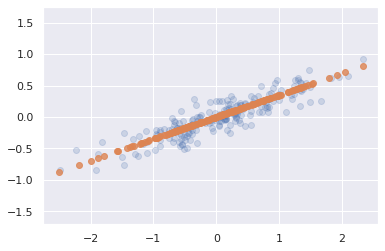

In [70]:
#lo vuelvo a transformar a 2 dimensiones para visualizarlo 
X_redux_inv = np.dot(X_redux, autovalores_subset.T)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_redux_inv[:, 0], X_redux_inv[:, 1], alpha=0.8)
plt.axis('equal');

### PCA para visualización 

Para este caso vamos a utilizar un dataset que contiene imagenes de números escritos a mano y un valor target que representa el verdadero número que se trato de escribir a mano. 


In [71]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

vemos que tenemos un dataset de 1797 filas o samples con 64 variables, si transformamos las imagenes de 8x8 en un vector de 1 dimensión de 64 valores. Donde cada fila sería uno de los números 

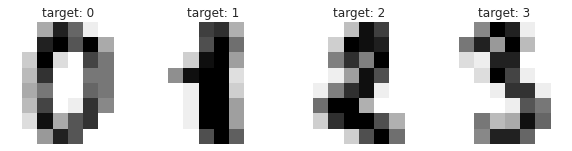

In [72]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("target: %i" % label)

Reducimos esa matríz a 2 dimensiones y graficamos 

In [73]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


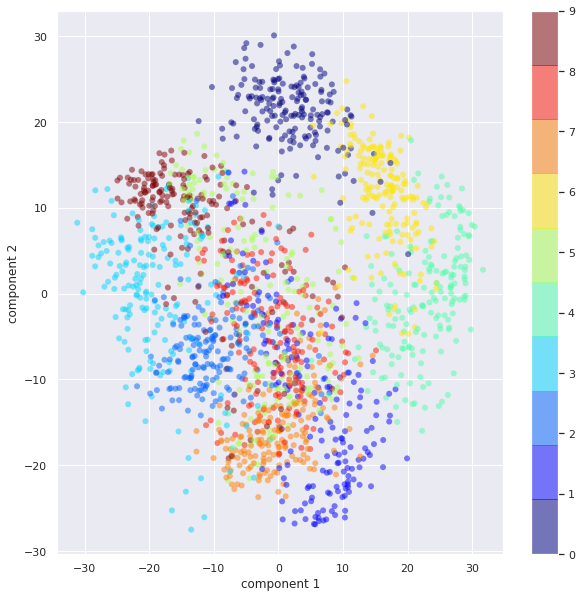

In [74]:
plt.subplots(1,1, figsize=(10, 10))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('jet', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
# Representar en 3 dimensiones este dataset. 

### Limitaciones 

PCA basa su método en propiedades del espacio euclidiano propias del álgebra que manejamos. Esto genera que no pueda entender relaciones de espacios no euclidianos o datos con relaciones no lineales. 
Para esto existen otros métodos. 


### Reducción de dimensionalidad: TSNE y UMAP 

Para salir del espacio euclideano podemos utilizar estos dos extendidos métodos para reducir dimensionalidad. 

t-SNE ([t-distributed Stochastic Neighbor Embedding](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf))


Este método llega para resolver el problema que tiene PCA para trabajar con espacios no euclideanos que no podemos abarcar con Álgebra lineal. 
Por ende es más complejo que PCA y vamos a tocar los conceptos principales unicamente. 

t-SNE trabaja en primer lugar calculando la distribución de probabilidad que representa similaridad entre puntos vecinos. Una distribución que responde a que tan probable es que elija este otro punto como vecino. Esta distribución el modelo la supone Gauseana. 

<center><img src=https://miro.medium.com/max/1400/0*j6P77qstfwQ6mkT8.png width=500></center>

<center><img src=https://miro.medium.com/max/1400/0*Afr8xsKrl6dwZ10Q.png width=500></center>

**Cómo realiza entonces la reducción de dimensionalidad** 
Al encontrar distribuciones parecidas entre distintos grupos de vecinos (sí, es una clusterización) el modelo va a tratar de unirlos en una nueva distribución de probabilidad que le permita deshacerse de una de las dimensiones que describen a los datos. La nueva distribución que utiliza este método es *T de student*. De aquí el nombre. 

Este proceso se optimiza iterativamente para encontrar los mejores grupos y las mejores distribuciones que los expliquen. Para esto se utiliza una distancia estadística muy extendida como métrica en machine learning conocida como [divergencia Kullback-Leibler](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence)

In [75]:
from numpy.random import RandomState
import matplotlib.pyplot as plt
from matplotlib import ticker

# unused but required import for doing 3d projections with matplotlib < 3.2
# import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import manifold, datasets

rng = RandomState(0)

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=rng)

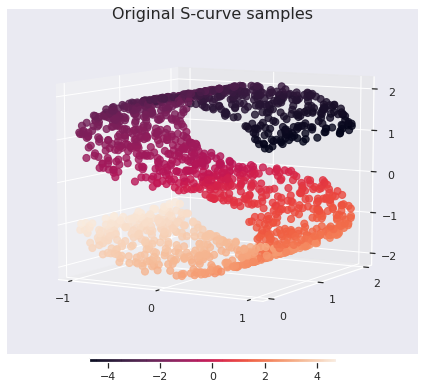

In [ ]:
#recreamos un espacio no euclideano 
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


plot_3d(S_points, S_color, "Original S-curve samples")


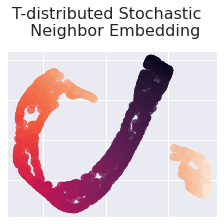

In [ ]:
t_sne = manifold.TSNE(
    n_components=2,
    learning_rate="auto",
    perplexity=30,
    n_iter=250,
    init="random",
    random_state=rng,
)
S_t_sne = t_sne.fit_transform(S_points)

plot_2d(S_t_sne, S_color, "T-distributed Stochastic  \n Neighbor Embedding")

In [ ]:
#Ejercicio: probar pca sobre este dataset sintético 

In [76]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### limitaciones de t-SNE 
- Este método no escala bien de manera robusta y rápida. Utiliza grandes cantidades de memoria si tenemos demasiados datos. 
- tSNE no preserva la estructura global. Lo cual significa que representa bien cada cluster que encontró en relación a sus componentes pero no puede recrear de manera eficiente la relación entre clusters a la hora de reducir dimensiones. 



### UMAP 

Para atacar esas limitaciones aparece UMAP.
El principio que utiliza UMAP es similar al método anterior. Busca cluster por similitud y trata de encontrar distribuciones conjuntas en espacios de menor dimensión. 
Sin embargo es mucho más potente y eficiente gracias a pequeñas diferencias como la utilización de otra función de costa y de otras distribuciones de probabilidad. Tampoco realiza una normalización como lo hace t-SNE. Hoy en día es mas extendido el uso de UMAP sin embargo t-SNE sigue siendo de gran utilidad para visualizaciónes de espacios en menores dimensiones. 

In [77]:
from umap import UMAP
import plotly.express as px

features = S_points

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=S_color, labels={'color': 'class'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=S_color, labels={'color': 'class'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()

## Ejercitación 

Ya utilizamos un dataset de dígitos escritos a mano. Esta vez vamos a utilizar uno de mayor definición 28x28 pixels. Vamos a tratar de agruparlos y luego visualizarlos en 2 dimensiones. 

In [78]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [79]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print shape of dataset
print("Training: {}".format(X_train.shape))
print("Test: {}".format(X_test.shape))

Training: (60000, 28, 28)
Test: (10000, 28, 28)


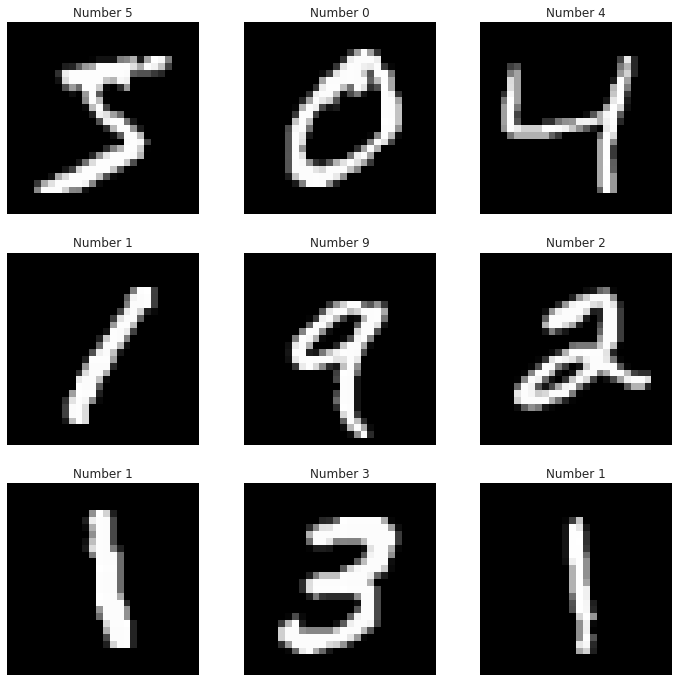

In [80]:
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.imshow(X_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
# display the figure
plt.show()

Primero debemos convertir las dimensiones de nuestro dataset para poder clusterizar. Necesitamos que las imagenes de 28x28 se transformen en un vector unidimensional de 784 valores. 

In [ ]:
X_train = #completar
X_train.shape

#### solución 

In [ ]:
# Convert each image to 1d array (28x28 -> 784x1)
X_train = X_train.reshape(len(X_train), -1)
print(X_train.shape)

(60000, 784)


#### normalizamos 
normalizamos los pixels en valores entre 0 y 1. Como la escala de colores pixel tiene 255 valores, debemos dividir por dicho valor. 

In [ ]:
X_train = X_train.astype(np.float32) / 255

Aplicamos kmeans. En este ejercicio te recomendamos utilizar [Minibatch kmeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html) que es un mejor del algoritmo original. 
recorda elegir la cantidad de clusters. En este caso sabemos la cantidad de clusters de ante mano ya que sabemos las clases de nuestro dataset. Por ende utiliza la cantidad de números distintos en tu dataset. 

In [ ]:
from sklearn.cluster import MiniBatchKMeans
kmeans = #completar 
kmeans.fit(X_train)

####solucion 


In [ ]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=10)
kmeans.fit(X_train)

MiniBatchKMeans(n_clusters=10)

#### evaluamos 

In [ ]:
from sklearn.metrics import homogeneity_score

def calc_metrics(estimator, data, labels):
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    # Inertia
    inertia = #completar
    print("Inertia: {}".format(inertia))
    # Homogeneity Score
    homogeneity = #completar
    print("Homogeneity score: {}".format(homogeneity))
    return inertia, homogeneity

#### solución 


In [ ]:
from sklearn.metrics import homogeneity_score

def calc_metrics(estimator, data, labels):
    print('Number of Clusters: {}'.format(estimator.n_clusters))
    # Inertia
    inertia = estimator.inertia_
    print("Inertia: {}".format(inertia))
    # Homogeneity Score
    homogeneity = homogeneity_score(labels, estimator.labels_)
    print("Homogeneity score: {}".format(homogeneity))
    return inertia, homogeneity

#### elegimos mejor modelo 

In [ ]:
from sklearn.metrics import accuracy_score

clusters = [10, 16, 36, 64, 144, 256] # tomamos diferentes cantidades de clusters
iner_list = []
homo_list = []
acc_list = []

for n_clusters in clusters:
    estimator = MiniBatchKMeans(n_clusters=n_clusters)
    estimator.fit(X_train)
    
    inertia, homo = calc_metrics(estimator, X_train, y_train)
    iner_list.append(inertia)
    homo_list.append(homo)

Number of Clusters: 10
Inertia: 155025319505.12714
Homogeneity score: 0.4393938041825427
Number of Clusters: 16
Inertia: 143951686940.29642
Homogeneity score: 0.5448179523299865
Number of Clusters: 36
Inertia: 126946874830.25687
Homogeneity score: 0.6970164383178118
Number of Clusters: 64
Inertia: 117163022168.41623
Homogeneity score: 0.7445057433420843
Number of Clusters: 144
Inertia: 105548544613.29117
Homogeneity score: 0.8054150062301242
Number of Clusters: 256
Inertia: 98112185791.31416
Homogeneity score: 0.838485677794318


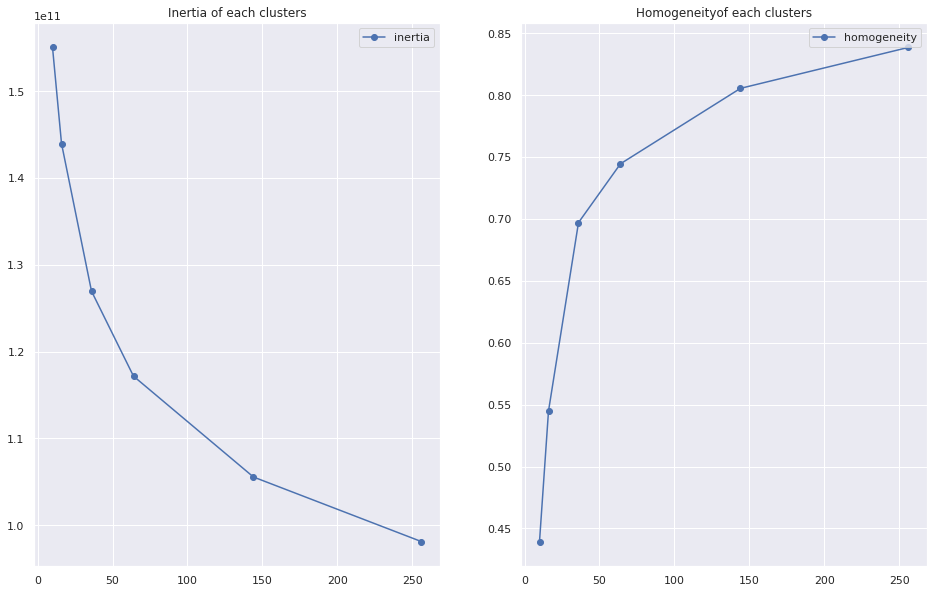

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 10))
ax[0].plot(clusters, iner_list, label='inertia', marker='o')
ax[1].plot(clusters, homo_list, label='homogeneity', marker='o')
ax[0].legend(loc='best')
ax[1].legend(loc='best')
ax[0].grid('on')
ax[1].grid('on')
ax[0].set_title('Inertia of each clusters')
ax[1].set_title('Homogeneityof each clusters')
plt.show()

#### umap 
Ahora a visualizar los resultados. Elegí el algorítmo que mas te guste y visualiza tus grupos encontrados.
Recorda que este dataset tiene la verdadera categoría de las imagenes. Podes evaluar como funciono tu algoritmo de agrupación en terminos de *accuracy*

In [ ]:
len(kmeans.labels_)

60000

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
from umap import UMAP
import plotly.express as px

features = X_train 

umap_2d = UMAP(n_components=2, init='random', random_state=0)
umap_3d = UMAP(n_components=3, init='random', random_state=0)

proj_2d = umap_2d.fit_transform(features)
proj_3d = umap_3d.fit_transform(features)

#Gráfica los resultados

#### solución 

In [ ]:
fig_2d = px.scatter(
    proj_2d, x=0, y=1,
    color=kmeans.labels_, labels={'color': 'class'}
)
fig_3d = px.scatter_3d(
    proj_3d, x=0, y=1, z=2,
    color=kmeans.labels_, labels={'color': 'class'}
)
fig_3d.update_traces(marker_size=5)

fig_2d.show()
fig_3d.show()